# Note

- Lat and long are for districts and not for individual projects
- Price is in Baht
- Area is in square meters
- Listings with nan 'floor' and 'bed' are defaulted to 1

# Setup

In [ ]:
# install requirements
!pip install pandas matplotlib seaborn cartopy contextily

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import contextily as cx
sns.set_style("whitegrid")

# Load Data

In [ ]:
# load csv
df = pd.read_csv('place_your.csv')

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85834 entries, 0 to 85833
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        85834 non-null  object 
 1   project      85834 non-null  object 
 2   district     85834 non-null  object 
 3   bed          85834 non-null  float64
 4   bath         85834 non-null  float64
 5   floor        85834 non-null  float64
 6   area         85834 non-null  float64
 7   price        85834 non-null  float64
 8   lat          85834 non-null  float64
 9   lon          85834 non-null  float64
 10  thb/sqm      85834 non-null  float64
 11  postal_code  85834 non-null  int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 7.9+ MB


In [148]:
df.head()

,title,project,district,bed,bath,floor,area,price,lat,lon,thb/sqm,postal_code
0,One 89 Wireless - Ultra-Luxury 3 Bedroom Condo...,ONE89 Wireless,Pathum Wan,2.0,2.0,1.0,226.0,950000.0,13.744942,100.522200,4203.539823,10330
1,3-BR Condo at One 89 Wireless near MRT Lumphin...,ONE89 Wireless,Pathum Wan,3.0,4.0,31.0,226.0,950000.0,13.744942,100.522200,4203.539823,10330
2,"Grand Langsuan 3 bedrooms,",Grand Langsuan,Pathum Wan,3.0,3.0,1.0,170.0,900000.0,13.744942,100.522200,5294.117647,10330
3,"3-BR Condo at The Ritz-Carlton Residences, Ban...",The Ritz - Carlton Residences at MahaNakhon,Bang Rak,3.0,3.0,57.0,408.0,900000.0,13.730833,100.524167,2205.882353,10500
4,LINE ID @cutecondo BEAUTIFUL ROOM +FULLY FURNI...,The Ritz - Carlton Residences at MahaNakhon,Bang Rak,3.0,3.0,57.0,408.0,900000.0,13.730833,100.524167,2205.882353,10500


In [149]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bed,85834.0,1.389065,0.630860,1.000000,1.000000,1.000000,2.000000,7.000000e+00
bath,85834.0,1.340611,0.647571,1.000000,1.000000,1.000000,2.000000,7.000000e+00
floor,85834.0,14.513866,15.075461,0.000000,5.000000,12.000000,22.000000,2.150000e+03
area,85834.0,89.430168,9599.743106,1.000000,32.000000,41.000000,61.000000,2.812500e+06
price,85834.0,36892.274810,39853.582967,1500.000000,16500.000000,25000.000000,42000.000000,9.500000e+05
lat,85834.0,13.746674,0.040543,13.647200,13.708056,13.742222,13.769722,1.391917e+01
lon,85834.0,100.565390,0.041845,100.348889,100.534444,100.579444,100.585833,1.007597e+02
thb/sqm,85834.0,633.277227,300.657490,0.004444,450.000000,583.333333,757.575758,3.666667e+04
postal_code,85834.0,10305.432230,229.228269,10100.000000,10110.000000,10260.000000,10400.000000,1.090000e+04


# Plots

# Overview

### listing density

Overview of listings density by districts.

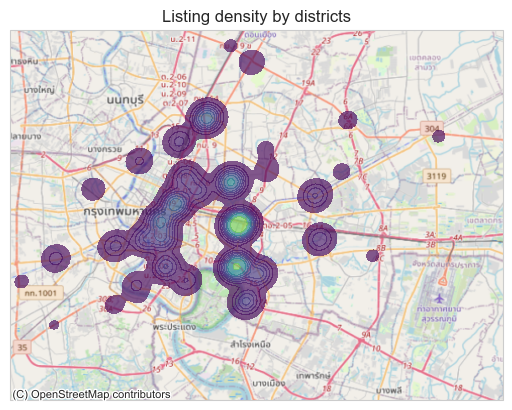

In [150]:
# ------------------------------------------------------------------
# 1.  Create the map axis
# ------------------------------------------------------------------
# PlateCarree == lon/lat in degrees
ax = plt.axes(projection=ccrs.PlateCarree())

# manually set the extent of map
ax.set_extent([100.4, 100.8, 13.6, 13.9])

# Add a basemap
cx.add_basemap(
    ax, crs=ccrs.PlateCarree(),
    source=cx.providers.OpenStreetMap.Mapnik   
)
# ------------------------------------------------------------------
# 2.  Overlay the KDE
# ------------------------------------------------------------------
sns.kdeplot(
    x=df["lon"], y=df["lat"],
    fill=True, cmap="viridis", alpha=0.65,
    ax=ax, transform=ccrs.PlateCarree()
)

ax.set_title("Listing density by districts")
plt.savefig("images/listing_density.png", dpi=300, bbox_inches='tight')
plt.show()

### Listings by district

we can see that Wattthana, Khlong Toi districts make up almost 1/3 of total listings which might screw with the interpretation.  

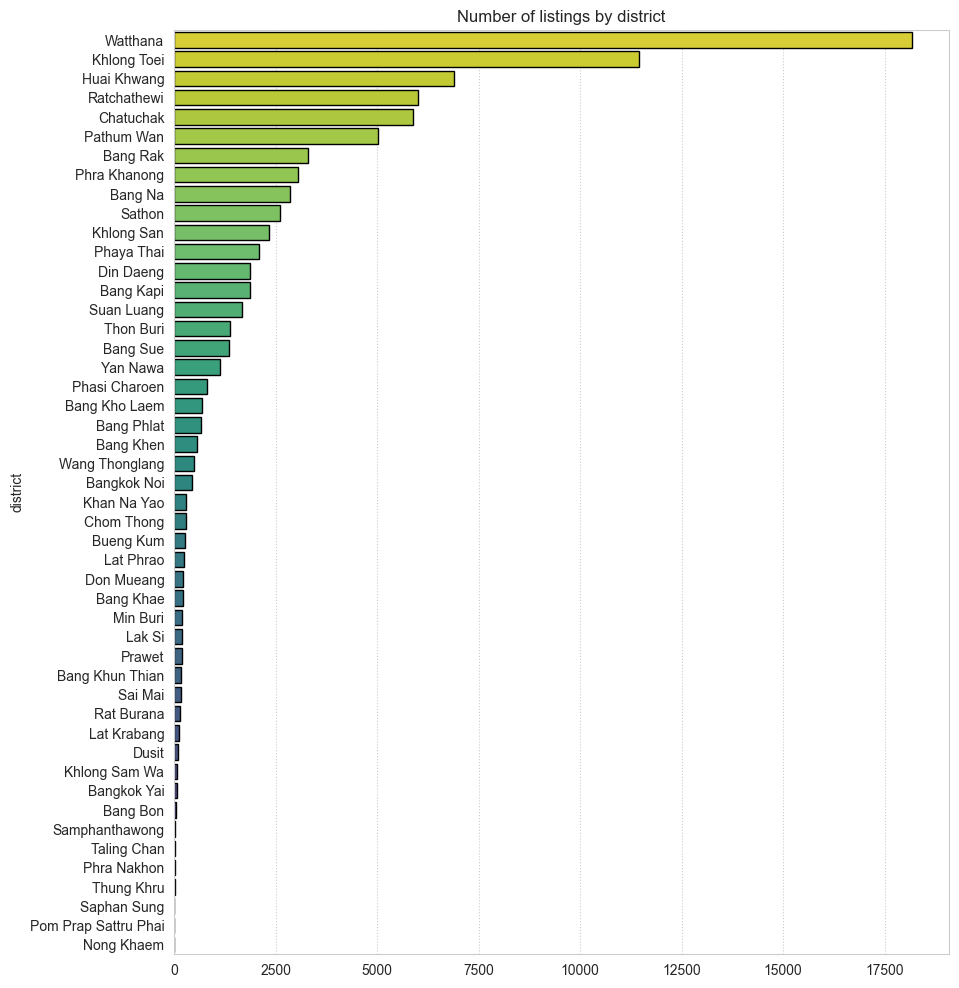

In [151]:
# ------------------------------------------------------------------
# 1. Count the number of listings in each district
# ------------------------------------------------------------------
counts = df["district"].value_counts()

# ------------------------------------------------------------------
# 2. Draw the barplot
# ------------------------------------------------------------------
plt.figure(figsize=(10, 12))
ax = sns.barplot(
        y=counts.index,
        x=counts.values,
        palette="viridis_r",
        linewidth=1,
        hue=counts.index,
        legend=False,
        edgecolor="black",
        orient="h")
ax.set_title("Number of listings by district")
ax.grid(True, ls=":", axis="x")
# save the plot 
plt.savefig("images/all_listings.png", dpi=300)
plt.show()

### listings (with median price)

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/783270611.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


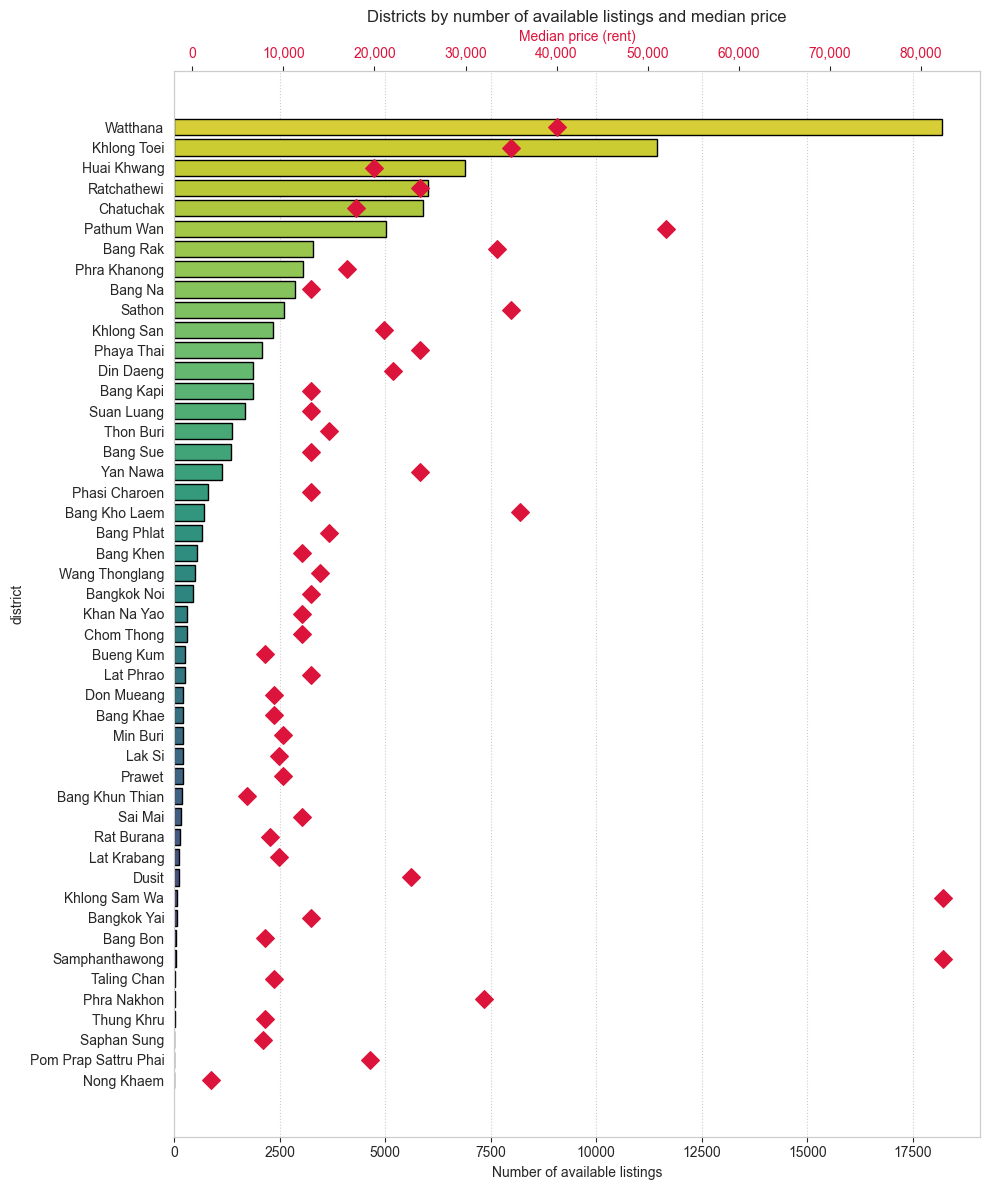

In [152]:
# 48 (total) districts with the most listings
top_districts_by_listing = (
    df["district"]
      .value_counts()
      .head(48)
      .rename("listing_count")
      .reset_index()
)

# median price for those exact districts
median_price = (
    df.groupby("district")["price"]
      .median()
      .loc[top_districts_by_listing["district"]]   # keep same order
)

fig, ax = plt.subplots(figsize=(10, 12))

# barplot of listing counts
sns.barplot(
    data=top_districts_by_listing,
    y="district",
    x="listing_count",
    palette="viridis_r",
    edgecolor="black",
    lw=1,
    ax=ax,
)

# secondary x-axis for median prices
ax2 = ax.twiny()
ax2.scatter(
    median_price.values,
    range(len(top_districts_by_listing)),
    color="crimson",
    marker="D",
    s=80,
)
ax2.set_xlabel("Median price (rent)", color="crimson")
ax2.tick_params(axis="x", labelcolor="crimson")
ax2.xaxis.set_major_formatter(lambda x, pos: f"{int(x):,}")
ax2.grid(False)

ax.set_title("Districts by number of available listings and median price")
ax.set_xlabel("Number of available listings")
ax.grid(True, ls=":", axis="x")

fig.tight_layout()
plt.savefig("images/all_listings+median_price.png", dpi=300)
plt.show()


### price by district

box plot of price by district, excluding the lowest and highest 0.5 % for outliers.

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/362271562.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price = clean.groupby("district")["price"].mean().sort_values()
/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/362271562.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["district"] = pd.Categorical(


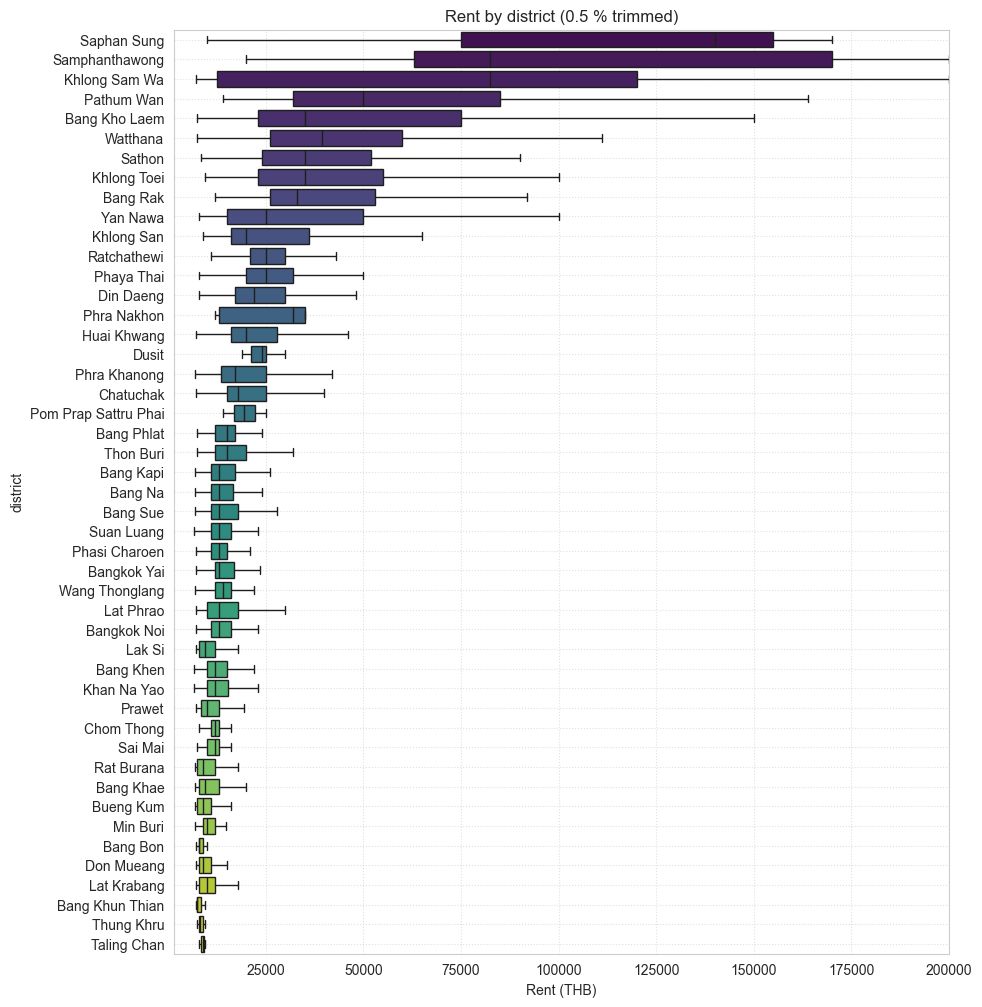

In [153]:
# ------------------------------------------------------------------
# 0. Compute the average price per district (after trimming)
# ------------------------------------------------------------------
mean_price = clean.groupby("district")["price"].mean().sort_values()

# ------------------------------------------------------------------
# 1. Exclude the lowest and highest 0.5 % of all observations
# ------------------------------------------------------------------
lo, hi = df["price"].quantile([.005, .995])
clean = df[(df["price"] >= lo) & (df["price"] <= hi)]

# ------------------------------------------------------------------
# 2. Order the district column by the computed averages
# ------------------------------------------------------------------
# Keep the ascending order → lowest average first
district_order = mean_price.index         

clean["district"] = pd.Categorical(
    clean["district"],
    categories=district_order,
    ordered=True
)

# ------------------------------------------------------------------
# 3. Draw the horizontal boxplot
# ------------------------------------------------------------------
plt.figure(figsize=(10, 12))
ax = sns.boxplot(
        y="district",
        x="price",
        data=clean,
        palette="viridis_r",
        hue="district",
        legend=False,          
        orient="h",
        fliersize=0)


ax.set_xlim(1499,200001)
ax.set_title("Rent by district (0.5 % trimmed)")
ax.set_xlabel("Rent (THB)")

# Explicitly invert the y-axis to show lowest average at the bottom
ax.invert_yaxis()
ax.grid(True, linestyle=':', alpha=0.6)
# save the plot 
plt.savefig("images/price_by_district.png", dpi=300)
plt.show()

### thb/sqm by district

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/2618603399.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price = clean.groupby("district")["thb/sqm"].mean().sort_values()
/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/2618603399.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["district"] = pd.Categorical(
/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/2618603399.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` 

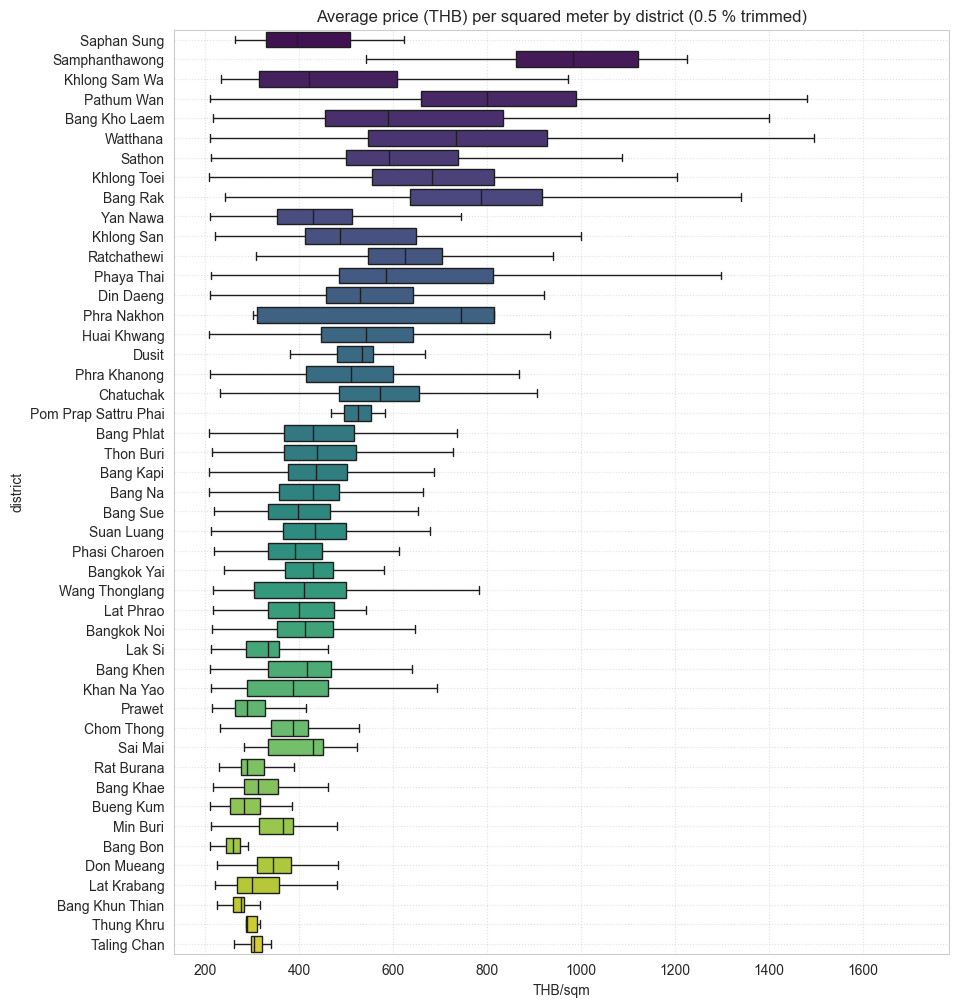

In [154]:
# ------------------------------------------------------------------
# 0. Compute the average price per district (after trimming)
# ------------------------------------------------------------------
mean_price = clean.groupby("district")["thb/sqm"].mean().sort_values()

# ------------------------------------------------------------------
# 1. Exclude the lowest and highest 0.5 % of all observations
# ------------------------------------------------------------------
lo, hi = df["thb/sqm"].quantile([.005, .995])
clean = df[(df["thb/sqm"] >= lo) & (df["thb/sqm"] <= hi)]

# ------------------------------------------------------------------
# 2. Order the district column by the computed averages
# ------------------------------------------------------------------
# Keep the ascending order → lowest average first
district_order = mean_price.index         

clean["district"] = pd.Categorical(
    clean["district"],
    categories=district_order,
    ordered=True
)

# ------------------------------------------------------------------
# 3. Draw the horizontal boxplot
# ------------------------------------------------------------------
plt.figure(figsize=(10, 12))
ax = sns.boxplot(
        y="district",
        x="thb/sqm",
        data=clean,
        palette="viridis_r",
        orient="h",
        fliersize=0)

ax.set_title("Average price (THB) per squared meter by district (0.5 % trimmed)")
ax.set_xlabel("THB/sqm")

# Explicitly invert the y-axis to show lowest average at the bottom
ax.invert_yaxis()
ax.grid(True, linestyle=':', alpha=0.6)
# save the plot 
plt.savefig("images/thb_sqm_by_district.png", dpi=300)
plt.show()

### Room size by district

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/3516962718.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price = clean.groupby("district")["area"].mean().sort_values()
/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/3516962718.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["district"] = pd.Categorical(


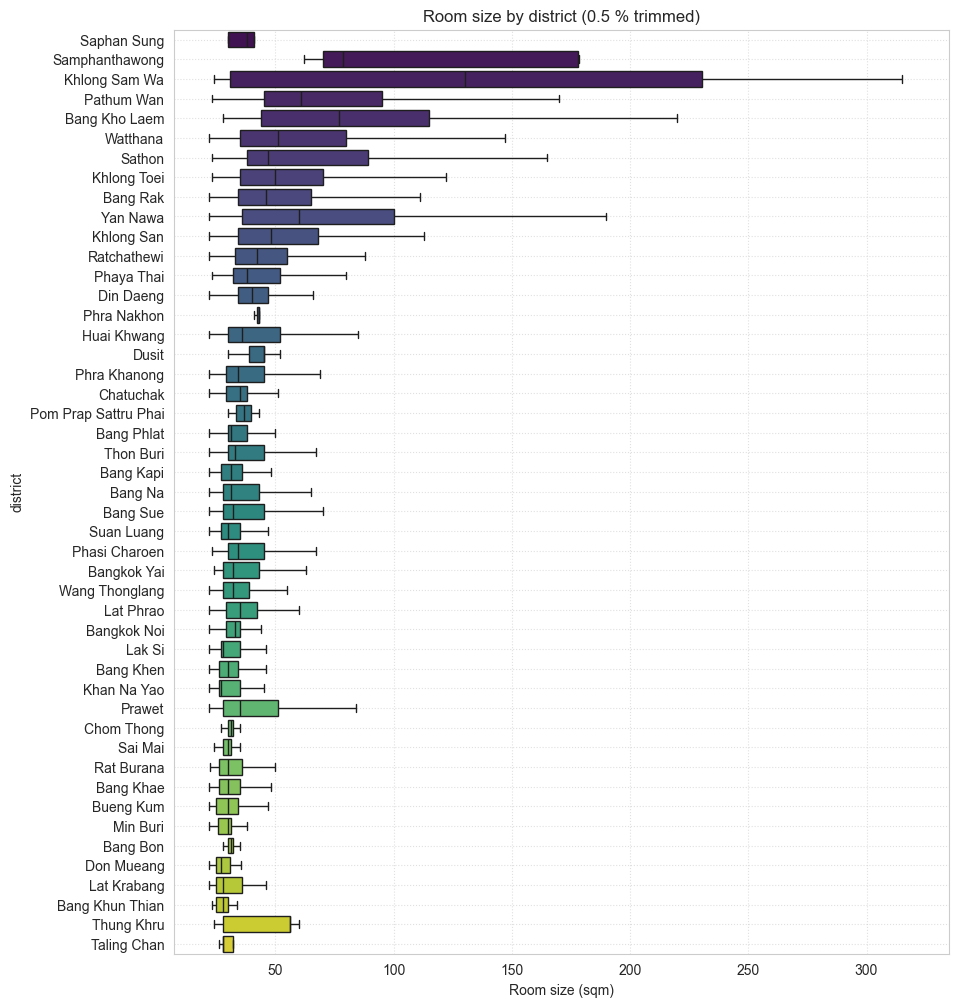

In [155]:
# ------------------------------------------------------------------
# 0. Compute the average area per district (after trimming)
# ------------------------------------------------------------------
mean_price = clean.groupby("district")["area"].mean().sort_values()

# ------------------------------------------------------------------
# 1. Exclude the lowest and highest 0.5 % of all observations
# ------------------------------------------------------------------
lo, hi = df["area"].quantile([.005, .995])
clean = df[(df["area"] >= lo) & (df["area"] <= hi)]

# ------------------------------------------------------------------
# 2. Order the district column by the computed averages
# ------------------------------------------------------------------
# Keep the ascending order → lowest average first
district_order = mean_price.index         

clean["district"] = pd.Categorical(
    clean["district"],
    categories=district_order,
    ordered=True
)

# ------------------------------------------------------------------
# 3. Draw the horizontal boxplot
# ------------------------------------------------------------------
plt.figure(figsize=(10, 12))
ax = sns.boxplot(
        y="district",
        x="area",
        data=clean,
        palette="viridis_r",
        hue="district",        
        legend=False,          
        orient="h",
        fliersize=0)

ax.set_title("Room size by district (0.5 % trimmed)")
ax.set_xlabel("Room size (sqm)")

# Explicitly invert the y-axis to show lowest average at the bottom
ax.invert_yaxis()
ax.grid(True, linestyle=':', alpha=0.6)
# save the plot 
plt.savefig("images/Area_by_district.png", dpi=300)
plt.show()

## Bed by district

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/1883217292.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price = clean.groupby("district")["bed"].mean().sort_values()
/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/1883217292.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean["district"] = pd.Categorical(
/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/1883217292.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` vari

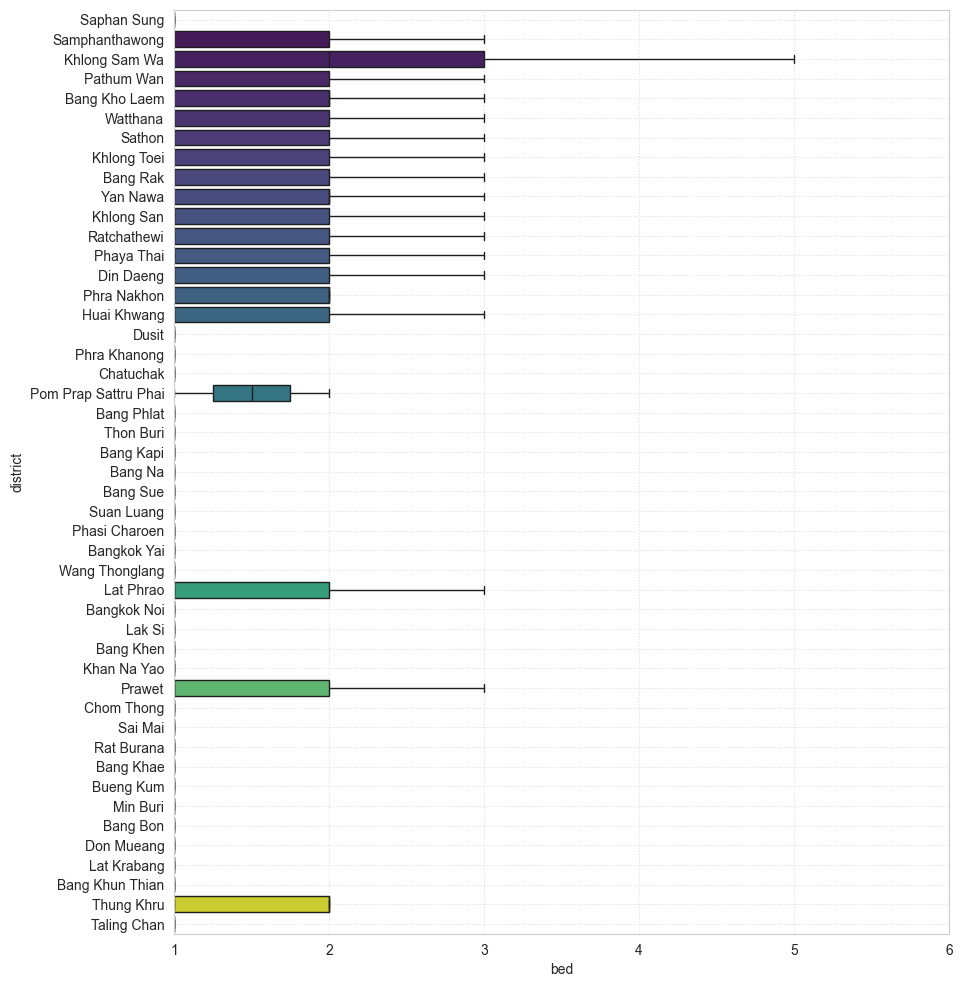

In [156]:
# ------------------------------------------------------------------
# 0. Compute the average price per district (after trimming)
# ------------------------------------------------------------------
mean_price = clean.groupby("district")["bed"].mean().sort_values()

# ------------------------------------------------------------------
# 1. Exclude the lowest and highest 0.5 % of all observations
# ------------------------------------------------------------------
# lo, hi = df["bed"].quantile([.005, .995])
# clean = df[(df["bed"] >= lo) & (df["bed"] <= hi)]

# ------------------------------------------------------------------
# 2. Order the district column by the computed averages
# ------------------------------------------------------------------
# Keep the ascending order → lowest average first
district_order = mean_price.index          # NOT reversed anymore

clean["district"] = pd.Categorical(
    clean["district"],
    categories=district_order,
    ordered=True
)

# ------------------------------------------------------------------
# 3. Draw the horizontal boxplot
# ------------------------------------------------------------------
plt.figure(figsize=(10, 12))
ax = sns.boxplot(
        y="district",
        x="bed",
        data=clean,
        palette="viridis_r",
        orient="h",
        fliersize=0)
ax.set_xlim(1,6)
# set log scale
# ax.set_xscale('log')
# ax.set_xticks([10000, 20000, 30000, 40000, 50000, 60000, 100000, 200000])
# ax.set_title("Average bedrooms by district (0.5 % trimmed, sorted by avg)")
ax.set_xlabel("bed")

# Explicitly invert the y-axis to show lowest average at the bottom
ax.invert_yaxis()
ax.grid(True, linestyle=':', alpha=0.6)
# save image
plt.savefig("images/bed_by_district.png")
plt.show()


## price distribution overall (0.5% trim)

Text(0.5, 1.0, 'Log (Price) distribution (0.5% trim)')

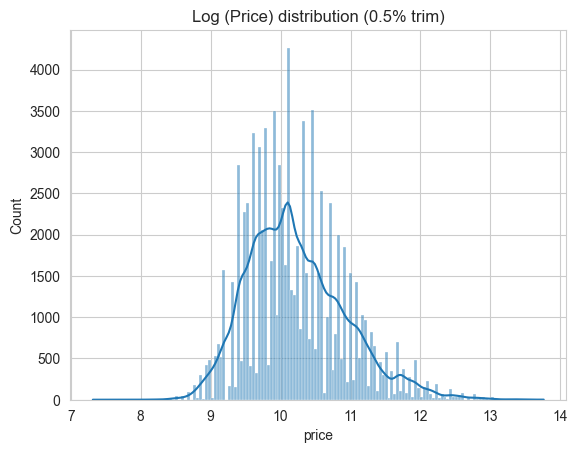

In [157]:
min_a, max_a = df["price"].quantile([0.005, 0.995])

# 2. select inside both ranges
mask = (
    (df["price"] >= min_a) & (df["price"] <= max_a)
)
df_trim = df.loc[mask]

sns.histplot(np.log1p(df["price"]), kde=True)
# save image
plt.savefig("images/log_price_dist.png")
plt.title("Log (Price) distribution (0.5% trim)")

## area distribution (0.5% trim)

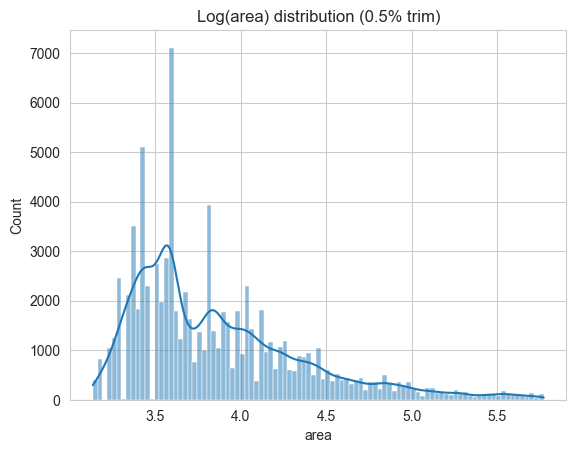

In [158]:
# 1. compute 0.5 % / 99.5 % quantiles
min_a, max_a = df["area"].quantile([0.005, 0.995])

# 2. select inside both ranges
mask = (
    (df["area"] >= min_a) & (df["area"] <= max_a)
)
df_trim = df.loc[mask]


sns.histplot(np.log1p(df_trim["area"]), kde=True)
plt.title("Log(area) distribution (0.5% trim)")
# save image
plt.savefig("images/log_area_dist.png")

## thb/sqm distribution (0.5% trim)

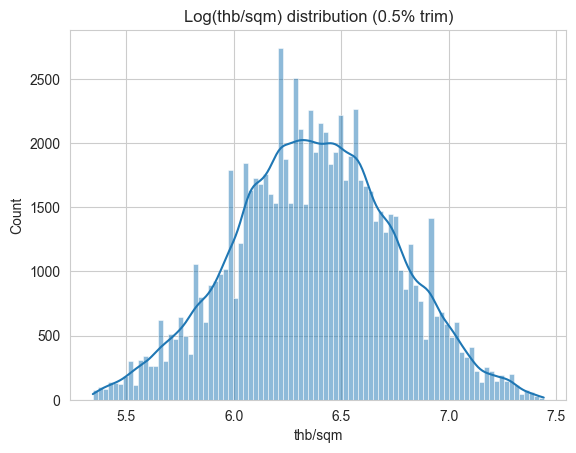

In [159]:
# 1. compute 0.5 % / 99.5 % quantiles
min_a, max_a = df["thb/sqm"].quantile([0.005, 0.995])

# 2. select inside both ranges
mask = (
    (df["thb/sqm"] >= min_a) & (df["thb/sqm"] <= max_a)
)
df_trim = df.loc[mask]

sns.histplot(np.log1p(df_trim["thb/sqm"]), kde=True)
plt.title("Log(thb/sqm) distribution (0.5% trim)")
# save image
plt.savefig("images/log_thb_sqm_dist.png")

# By District

## 20 most expensive (average price) districts

with >10 available listings

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/2163364459.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


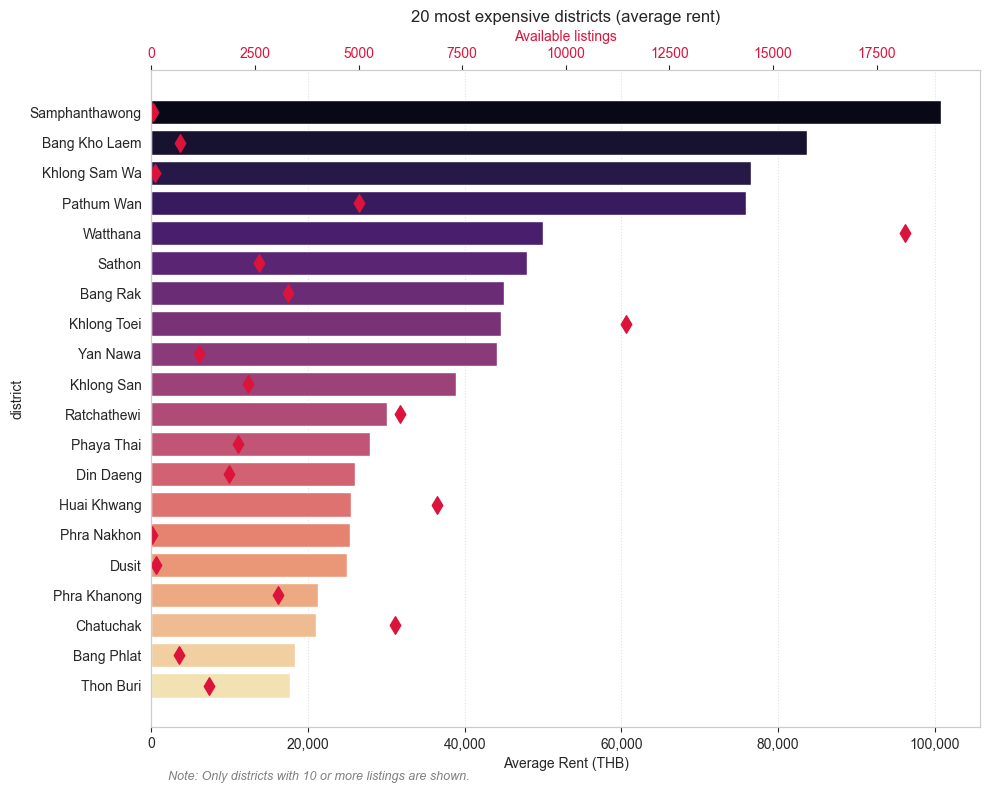

In [160]:
# ------------------------------------------------
# 1. Filter out districts with fewer than 10 listings
# ------------------------------------------------
project_counts = df.groupby('district')['title'].transform('size')
df_filtered = df[project_counts >= 10].copy()


# ------------------------------------------------
# 2. Top-20 MOST EXPENSIVE districts from the filtered list
# ------------------------------------------------
top_districts = (
    df_filtered.groupby("district")["price"]
      .mean()
      .sort_values(ascending=False)  # <-- EXPENSIVE first
      .head(20)
      .rename("avg_price")
      .to_frame()
      .reset_index()
)

# 3. Number of listings for THESE top districts
listing_count = (
    df_filtered[df_filtered["district"].isin(top_districts["district"])]
      .groupby("district")["title"]
      .size()
      .reindex(top_districts["district"])
)

# ------------------------------------------------
# 4. Create the plot
# ------------------------------------------------
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=top_districts,
    y="district",
    x="avg_price",
    palette="magma"
)
plt.title("20 most expensive districts (average rent)")
plt.xlabel("Average Rent (THB)")

# Format the price axis with commas
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# 5. Add listing count markers on a secondary x-axis
ax2 = ax.twiny()
ax2.scatter(
    listing_count.values,
    range(len(top_districts)),
    color="crimson",
    marker="d",
    s=80,
    label="Listing Count"
)
ax2.set_xlabel("Available listings", color="crimson")
ax2.tick_params(axis='x', labelcolor="crimson")
ax2.set_xlim(0, listing_count.max() * 1.1) # Start axis at 0 for counts


# ------------------------------------------------
# 6. Final Formatting
# ------------------------------------------------
ax.grid(True, linestyle=':', alpha=0.6, axis='x')
ax2.grid(False)

# Add the explanatory note at the bottom
ax.text(
    0.02, -0.08,
    "Note: Only districts with 10 or more listings are shown.",
    transform=ax.transAxes,
    fontsize=9,
    style='italic',
    color='grey'
)

plt.tight_layout()
# save image
plt.savefig("images/district_top20_expensive+available_listing.png", dpi=300)
plt.show()

## 20 most expensive (avg thb/sqm) districts

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/712275597.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


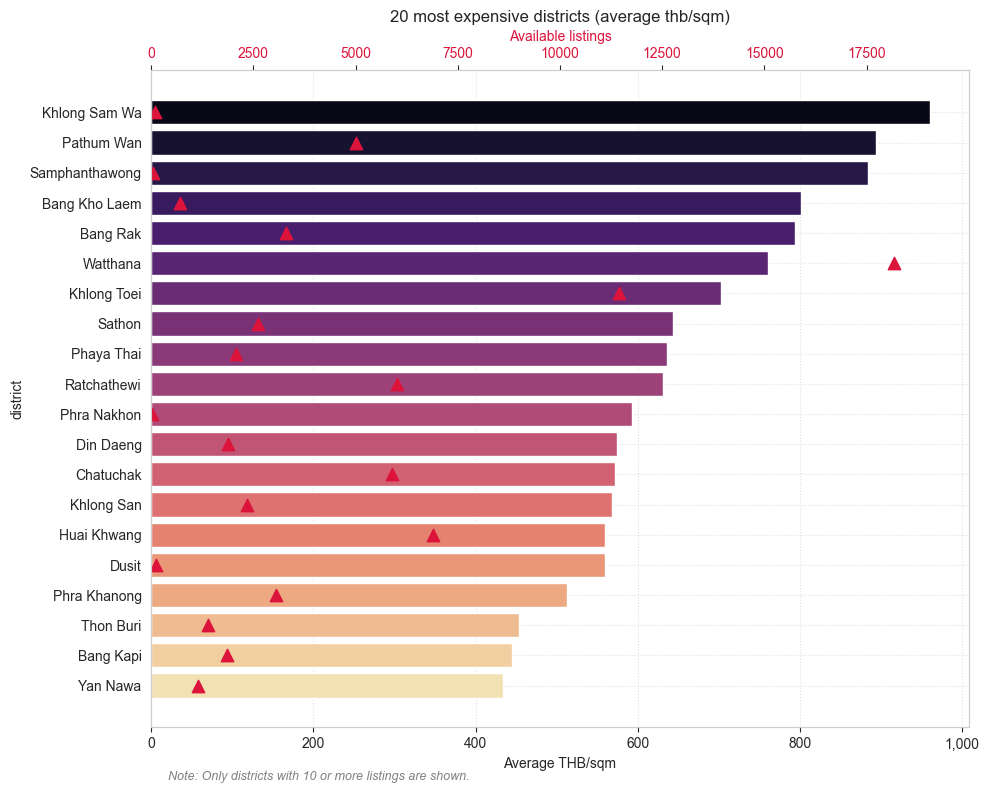

In [161]:
# ------------------------------------------------
# 1. Filter out districts with fewer than 10 listings
# ------------------------------------------------
project_counts = df.groupby('district')['title'].transform('size')
df_filtered = df[project_counts >= 10].copy()


# ------------------------------------------------
# 2. Top-20 MOST EXPENSIVE districts from the filtered list
# ------------------------------------------------
top_districts = (
    df_filtered.groupby("district")["thb/sqm"]
      .mean()
      .sort_values(ascending=False)  # <-- EXPENSIVE first
      .head(20)
      .rename("avg_price")
      .to_frame()
      .reset_index()
)

# 3. Number of listings for THESE top districts
listing_count = (
    df_filtered[df_filtered["district"].isin(top_districts["district"])]
      .groupby("district")["title"]
      .size()
      .reindex(top_districts["district"]) 
)

# ------------------------------------------------
# 4. Create the plot
# ------------------------------------------------
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=top_districts,
    y="district",
    x="avg_price",
    palette="magma"
)
plt.title("20 most expensive districts (average thb/sqm)")
plt.xlabel("Average THB/sqm")

# Format the price axis with commas
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# 5. Add listing count markers on a secondary x-axis
ax2 = ax.twiny()
ax2.scatter(
    listing_count.values,
    range(len(top_districts)),
    color="crimson",
    marker="^",
    s=80,
    label="Listing Count"
)
ax2.set_xlabel("Available listings", color="crimson")
ax2.tick_params(axis='x', labelcolor="crimson")
ax2.set_xlim(0, listing_count.max() * 1.1) # Start axis at 0 for counts


# ------------------------------------------------
# 6. Final Formatting
# ------------------------------------------------
ax.grid(True, linestyle=':', alpha=0.6)
ax2.grid(False)

# Add the explanatory note at the bottom
ax.text(
    0.02, -0.08,
    "Note: Only districts with 10 or more listings are shown.",
    transform=ax.transAxes,
    fontsize=9,
    style='italic',
    color='grey'
)

plt.tight_layout()
# save image
plt.savefig("images/district_top20_expensive_thbsqm+available_listing.png", dpi=300)
plt.show()

## 20 most affordable (avg price) districts

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/1623573894.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_districts,


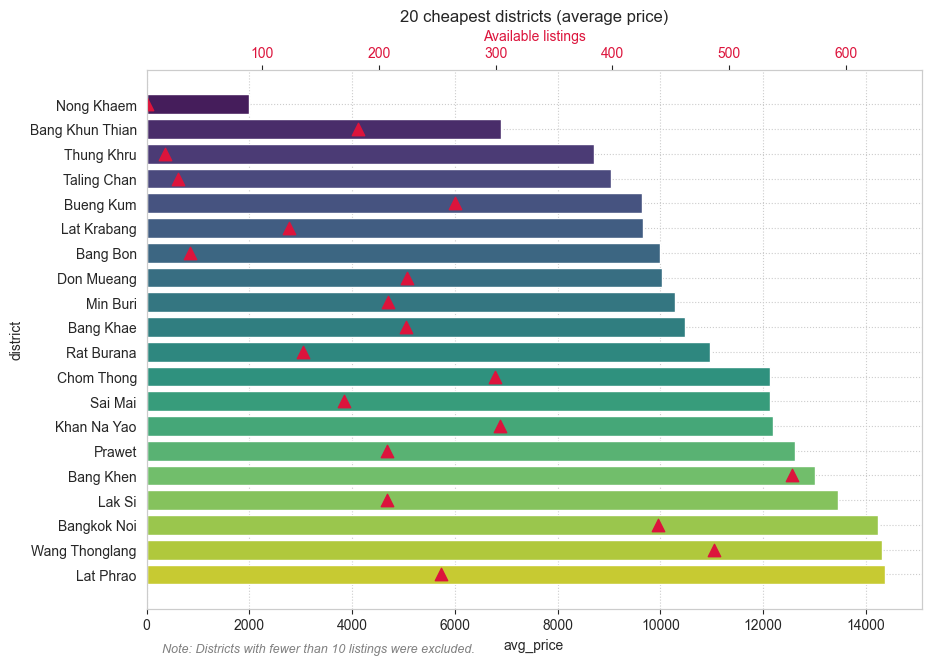

In [162]:
# ------------------------------------------------
# 1. Bottom-20 districts by average price
# ------------------------------------------------
top_districts = (df
                 .groupby("district")["price"]
                 .mean()
                 .sort_values(ascending=True)   # <-- CHEAPEST first
                 .head(20)
                 .rename("avg_price")
                 .to_frame()
                 .reset_index())

# 2. Number of listings per district (now really counts rows/titles)
listing_count = (
    df[df["district"].isin(top_districts["district"])]
      .groupby("district")["title"]          # <- change is here
      .size()                               # <- counts rows, not unique values
      .reindex(top_districts["district"])
)
# 3. Bar plot
plt.figure(figsize=(10, 7))
sns.barplot(data=top_districts,
            y="district",
            x="avg_price",
            palette="viridis")
plt.title("20 cheapest districts (average price)")

# 4. Project-count markers on a secondary x-axis
ax = plt.gca()
ax2 = ax.twiny()
ax2.scatter(listing_count.values,
            range(len(top_districts)),
            color="crimson",
            marker="^",
            s=80,
            label="Listing count")
ax2.set_xlabel("Available listings", color="crimson")
ax2.tick_params(axis='x', labelcolor="crimson")
ax2.set_xlim(listing_count.min()*0.8, listing_count.max()*1.2)

ax.grid(True, linestyle=':')
ax2.grid(False)

ax.text(0.02, -0.08,
        "Note: Districts with fewer than 10 listings were excluded.",
        transform=ax.transAxes,
        fontsize=9,
        style='italic',
        color='grey')
# save plot
plt.savefig("images/district_top20_affordable+available_listing.png", dpi=300)
plt.show()

## 20 most affordable (avg thb/sqm) districts

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/1062342417.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_districts,


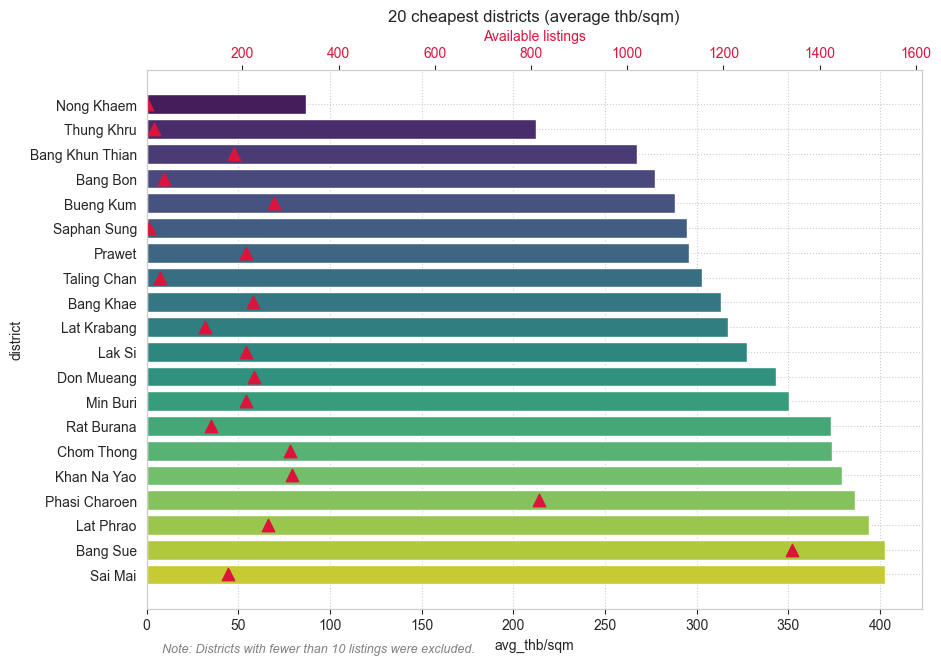

In [163]:
# ------------------------------------------------
# 1. Bottom-20 districts by thb/sqm
# ------------------------------------------------
top_districts = (df
                 .groupby("district")["thb/sqm"]
                 .mean()
                 .sort_values(ascending=True)   # <-- CHEAPEST first
                 .head(20)
                 .rename("avg_thb/sqm")
                 .to_frame()
                 .reset_index())

# 2. Number of listings per district (now really counts rows/titles)
listing_count = (
    df[df["district"].isin(top_districts["district"])]
      .groupby("district")["title"]          # <- change is here
      .size()                               # <- counts rows, not unique values
      .reindex(top_districts["district"])
)
# 3. Bar plot
plt.figure(figsize=(10, 7))
sns.barplot(data=top_districts,
            y="district",
            x="avg_thb/sqm",
            palette="viridis")
plt.title("20 cheapest districts (average thb/sqm)")

# 4. Project-count markers on a secondary x-axis
ax = plt.gca()
ax2 = ax.twiny()
ax2.scatter(listing_count.values,
            range(len(top_districts)),
            color="crimson",
            marker="^",
            s=80,
            label="Listing count")
ax2.set_xlabel("Available listings", color="crimson")
ax2.tick_params(axis='x', labelcolor="crimson")
ax2.set_xlim(listing_count.min()*0.8, listing_count.max()*1.2)

ax.grid(True, linestyle=':')
ax2.grid(False)

ax.text(0.02, -0.08,
        "Note: Districts with fewer than 10 listings were excluded.",
        transform=ax.transAxes,
        fontsize=9,
        style='italic',
        color='grey')

# save plot
plt.savefig("images/district_top20_affordable_thbsqm+available_listing.png", dpi=300)
plt.show()


# By Project

## 20 most expensive (avg price) projects (>10 listing)

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/1738101245.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


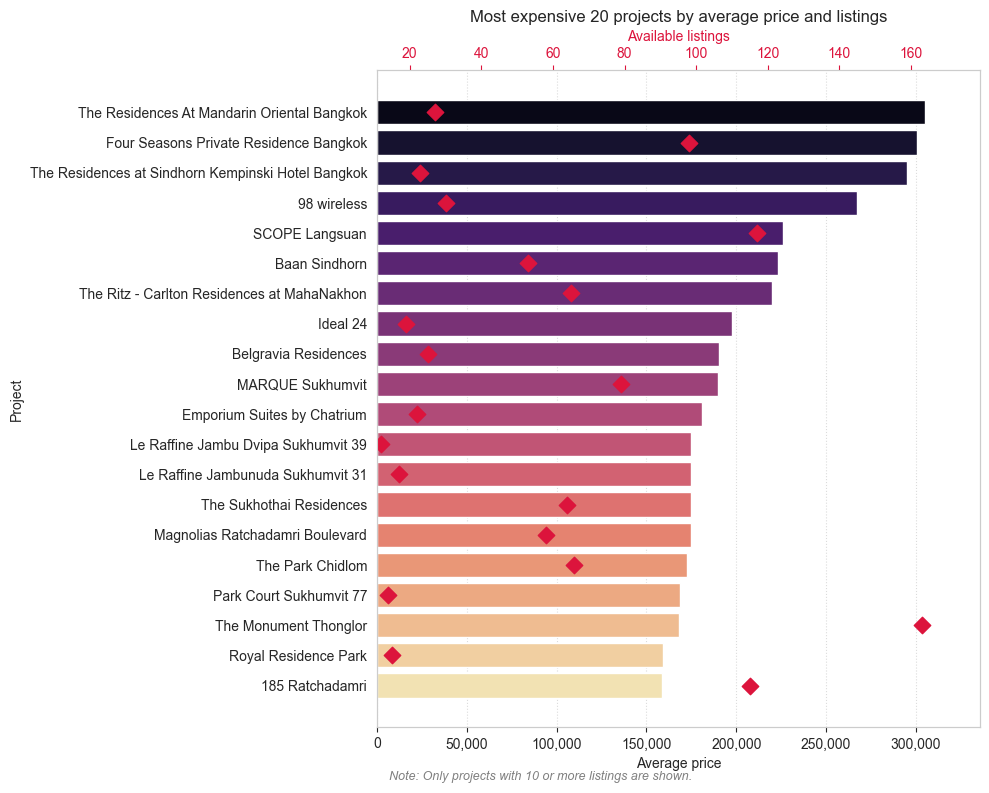

In [164]:
# ------------------------------------------------
# 1. Filter out projects with fewer than 10 listings
# ------------------------------------------------
project_counts = df.groupby('project')['title'].transform('size')
df_filtered = df[project_counts >= 10].copy()

project_counts = df_filtered.groupby("project")["price"].size().rename("n_listings")

# --- MOST EXPENSIVE projects (instead of cheapest) ---
top_projects_by_price = (
    df_filtered
    [df_filtered["project"].map(project_counts) > 10]
    .groupby("project")["price"]
    .mean()
    .sort_values(ascending=False)    # descending => most expensive first
    .head(20)
    .rename("avg_price")
    .to_frame()
    .reset_index()
)

# ------------------------------------------------------------------
# 2. Available-listing count for THESE expensive projects
# ------------------------------------------------------------------
listing_counts_for_top = (
    df[df["project"].isin(top_projects_by_price["project"])]
      .groupby("project")["title"]
      .size()
      .reindex(top_projects_by_price["project"])
      .rename("listing_count")
)

# ------------------------------------------------------------------
# 3. Bar plot for average price
# ------------------------------------------------------------------
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=top_projects_by_price,
    y="project",
    x="avg_price",
    palette="magma"
)
ax.set_title("Most expensive 20 projects by average price and listings")
ax.set_xlabel("Average price")
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# ------------------------------------------------------------------
# 4. Overlay diamond markers for listing count
# ------------------------------------------------------------------
ax2 = ax.twiny()
ax2.scatter(
    listing_counts_for_top.values,
    range(len(top_projects_by_price)),
    color="crimson",
    marker="D",
    s=70,
    label="Available listings"
)
ax2.set_xlabel("Available listings", color="crimson")
ax2.tick_params(axis='x', colors="crimson")
ax2.set_xlim(listing_counts_for_top.min() * 0.9,
             listing_counts_for_top.max() * 1.1)
ax2.grid(False)

# ------------------------------------------------------------------
# 5. Final touches
# ------------------------------------------------------------------
ax.grid(axis='x', linestyle=':', alpha=0.7)
ax.set_ylabel("Project")
ax.set_xlim(0, top_projects_by_price["avg_price"].max() * 1.1)
ax.text(
    0.02, -0.08,
    "Note: Only projects with 10 or more listings are shown.",
    transform=ax.transAxes,
    fontsize=9,
    style='italic',
    color='grey'
)
plt.tight_layout()
# save image
plt.savefig("images/projects_20expensive+listing.png")
plt.show()


## 20 most expensive (avg price) project with avg area and available listing (>10 listing)

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/4121774334.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


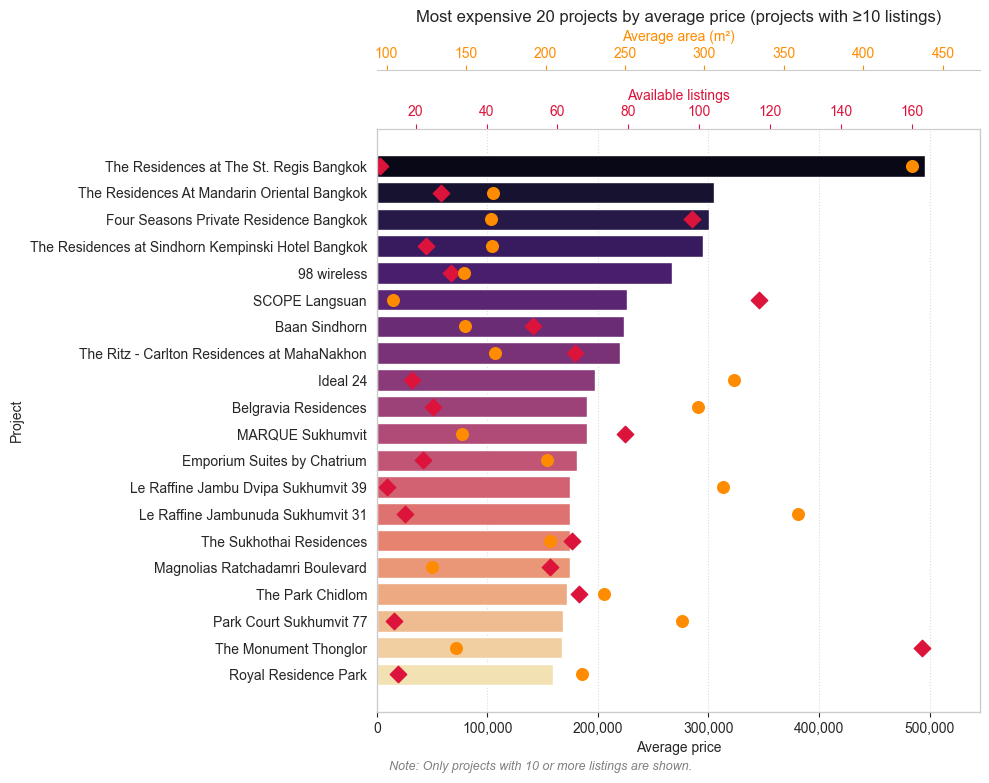

In [165]:
# ------------------------------------------------------------------
# 1. compute the 20 most expensive and carry the mean area
# ------------------------------------------------------------------
project_counts = df.groupby('project')['title'].transform('size')
df_filtered = df[project_counts >= 10].copy()

top_projects_by_price = (
    df_filtered
    .groupby("project")
    .agg(avg_price=("price", "mean"),
         avg_area=("area", "mean"))
    .sort_values(by="avg_price", ascending=False)   
    .head(20)
    .reset_index()
)

# ------------------------------------------------------------------
# 2. Listing counts for those projects
# ------------------------------------------------------------------
listing_counts_for_top = (
    df[df["project"].isin(top_projects_by_price["project"])]
      .groupby("project")["title"]
      .size()
      .reindex(top_projects_by_price["project"])
      .rename("listing_count")
)

# ------------------------------------------------------------------
# 3. Bar plot (most expensive projects)
# ------------------------------------------------------------------
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=top_projects_by_price,
    y="project",
    x="avg_price",
    palette="magma"
)
ax.set_title("Most expensive 20 projects by average price (projects with ≥10 listings)")
ax.set_xlabel("Average price")
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.grid(axis='x', linestyle=':', alpha=0.7)
ax.set_ylabel("Project")
ax.set_xlim(0, top_projects_by_price["avg_price"].max() * 1.1)

# ------------------------------------------------------------------
# 4. Top twin axis: available listings (diamond markers)
# ------------------------------------------------------------------
ax2 = ax.twiny()
ax2.scatter(
    listing_counts_for_top.values,
    range(len(top_projects_by_price)),
    color="crimson",
    marker="D",
    s=70,
    label="Available listings"
)
ax2.set_xlabel("Available listings", color="crimson")
ax2.tick_params(axis='x', colors="crimson")
ax2.set_xlim(listing_counts_for_top.min() * 0.9,
             listing_counts_for_top.max() * 1.1)
ax2.grid(False)

# ------------------------------------------------------------------
# 5. Bottom twin axis: average area (circle markers)
# ------------------------------------------------------------------
ax3 = ax.twiny()
ax3.scatter(
    top_projects_by_price["avg_area"],
    range(len(top_projects_by_price)),
    color="darkorange",
    marker="o",
    s=70,
    label="Average area (m²)",
    zorder=5
)
ax3.set_xlabel("Average area (m²)", color="darkorange")
ax3.tick_params(axis='x', colors="darkorange")
ax3.spines["top"].set_position(("axes", 1.1))
ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")
ax3.set_xlim(top_projects_by_price["avg_area"].min() * 0.9,
             top_projects_by_price["avg_area"].max() * 1.1)
ax3.grid(False)

# ------------------------------------------------------------------
# 7. Final touches
# ------------------------------------------------------------------
ax.text(
    0.02, -0.1,
    "Note: Only projects with 10 or more listings are shown.",
    transform=ax.transAxes,
    fontsize=9,
    style='italic',
    color='grey'
)
plt.tight_layout()

# save image
plt.savefig("images/projects_20expensive+area+listing.png")
plt.show()

## 20 most expensive (avg thb/sqm) project with avg area and available listing (>10 listing)

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/3199798898.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


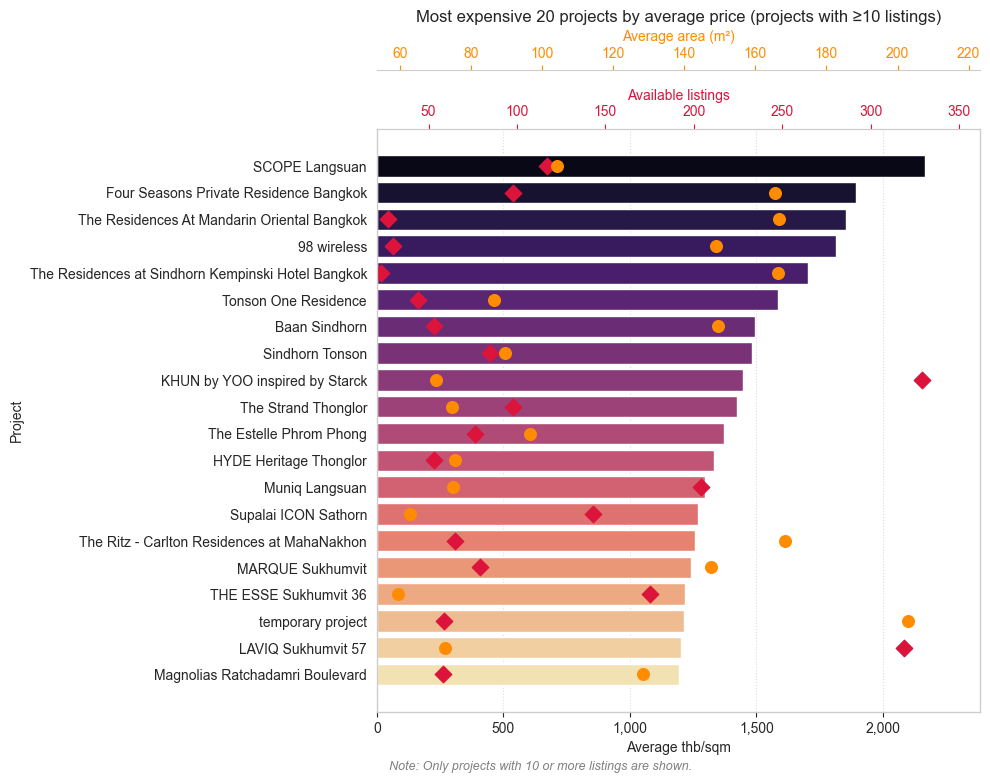

In [166]:
# ------------------------------------------------------------------
# 1. compute the 20 most expensive and carry the mean area
# ------------------------------------------------------------------
project_counts = df.groupby('project')['title'].transform('size')
df_filtered = df[project_counts >= 10].copy()

top_projects_by_price = (
    df_filtered
    .groupby("project")
    .agg(avg_price=("thb/sqm", "mean"),
         avg_area=("area", "mean"))
    .sort_values(by="avg_price", ascending=False)   
    .head(20)
    .reset_index()
)

# ------------------------------------------------------------------
# 2. Listing counts for those projects
# ------------------------------------------------------------------
listing_counts_for_top = (
    df[df["project"].isin(top_projects_by_price["project"])]
      .groupby("project")["title"]
      .size()
      .reindex(top_projects_by_price["project"])
      .rename("listing_count")
)

# ------------------------------------------------------------------
# 3. Bar plot (most expensive projects)
# ------------------------------------------------------------------
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=top_projects_by_price,
    y="project",
    x="avg_price",
    palette="magma"
)
ax.set_title("Most expensive 20 projects by average price (projects with ≥10 listings)")
ax.set_xlabel("Average thb/sqm")
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.grid(axis='x', linestyle=':', alpha=0.7)
ax.set_ylabel("Project")
ax.set_xlim(0, top_projects_by_price["avg_price"].max() * 1.1)

# ------------------------------------------------------------------
# 4. Top twin axis: available listings (diamond markers)
# ------------------------------------------------------------------
ax2 = ax.twiny()
ax2.scatter(
    listing_counts_for_top.values,
    range(len(top_projects_by_price)),
    color="crimson",
    marker="D",
    s=70,
    label="Available listings"
)
ax2.set_xlabel("Available listings", color="crimson")
ax2.tick_params(axis='x', colors="crimson")
ax2.set_xlim(listing_counts_for_top.min() * 0.9,
             listing_counts_for_top.max() * 1.1)
ax2.grid(False)

# ------------------------------------------------------------------
# 5. Bottom twin axis: average area (circle markers)
# ------------------------------------------------------------------
ax3 = ax.twiny()
ax3.scatter(
    top_projects_by_price["avg_area"],
    range(len(top_projects_by_price)),
    color="darkorange",
    marker="o",
    s=70,
    label="Average area (m²)",
    zorder=5
)
ax3.set_xlabel("Average area (m²)", color="darkorange")
ax3.tick_params(axis='x', colors="darkorange")
ax3.spines["top"].set_position(("axes", 1.1))
ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")
ax3.set_xlim(top_projects_by_price["avg_area"].min() * 0.9,
             top_projects_by_price["avg_area"].max() * 1.1)
ax3.grid(False)

# ------------------------------------------------------------------
# 7. Final touches
# ------------------------------------------------------------------
ax.text(
    0.02, -0.1,
    "Note: Only projects with 10 or more listings are shown.",
    transform=ax.transAxes,
    fontsize=9,
    style='italic',
    color='grey'
)
plt.tight_layout()

# save image
plt.savefig("images/projects_20expensive_thbsqm+area+listing.png")
plt.show()


## 20 most affordable (avg price) project (>10 listing)

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/1533635479.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


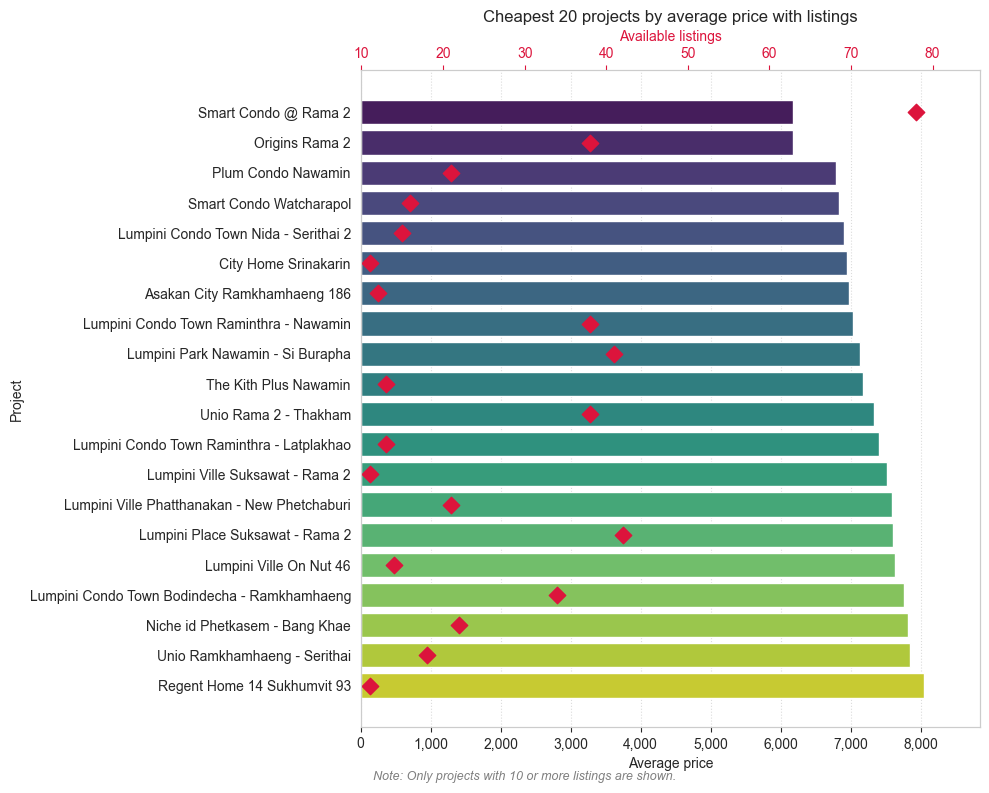

In [167]:
# ------------------------------------------------
# 1. Filter out projects with fewer than 10 listings (same as before)
# ------------------------------------------------
project_counts = df.groupby('project')['title'].transform('size')
df_filtered = df[project_counts >= 10].copy()

project_counts = df_filtered.groupby("project")["price"].size().rename("n_listings")

# --- cheapest projects (instead of top 20 most expensive) ---
bottom_projects_by_price = (
    df_filtered
    [df_filtered["project"].map(project_counts) > 10]
    .groupby("project")["price"]
    .mean()
    .sort_values(ascending=True)      # ascending => cheapest first
    .head(20)
    .rename("avg_price")
    .to_frame()
    .reset_index()
)

# ------------------------------------------------------------------
# 2. Available-listing count for THESE cheapest projects
# ------------------------------------------------------------------
listing_counts_for_bottom = (
    df[df["project"].isin(bottom_projects_by_price["project"])]
      .groupby("project")["title"]
      .size()
      .reindex(bottom_projects_by_price["project"])
      .rename("listing_count")
)

# ------------------------------------------------------------------
# 3. Bar plot for average price
# ------------------------------------------------------------------
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=bottom_projects_by_price,
    y="project",
    x="avg_price",
    palette="viridis"         
)
ax.set_title("Cheapest 20 projects by average price with listings")
ax.set_xlabel("Average price")
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x):,}'))

# ------------------------------------------------------------------
# 4. Overlay diamond markers for listing count
# ------------------------------------------------------------------
ax2 = ax.twiny()
ax2.scatter(
    listing_counts_for_bottom.values,
    range(len(bottom_projects_by_price)),
    color="crimson",
    marker="D",
    s=70,
    label="Available listings"
)
ax2.set_xlabel("Available listings", color="crimson")
ax2.tick_params(axis='x', colors="crimson")
ax2.set_xlim(listing_counts_for_bottom.min() * 0.9,
             listing_counts_for_bottom.max() * 1.1)
ax2.grid(False)

# ------------------------------------------------------------------
# 5. Final touches
# ------------------------------------------------------------------
ax.grid(axis='x', linestyle=':', alpha=0.7)
ax.set_ylabel("Project")
ax.set_xlim(0, bottom_projects_by_price["avg_price"].max() * 1.1)
ax.text(
    0.02, -0.08,
    "Note: Only projects with 10 or more listings are shown.",
    transform=ax.transAxes,
    fontsize=9,
    style='italic',
    color='grey'
)
plt.tight_layout()
# save image
plt.savefig("images/projects_20affordable+listing.png")
plt.show()

## 20 most affordable (avg price) project with avg area and available listing (>10 listing)

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/1599050008.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


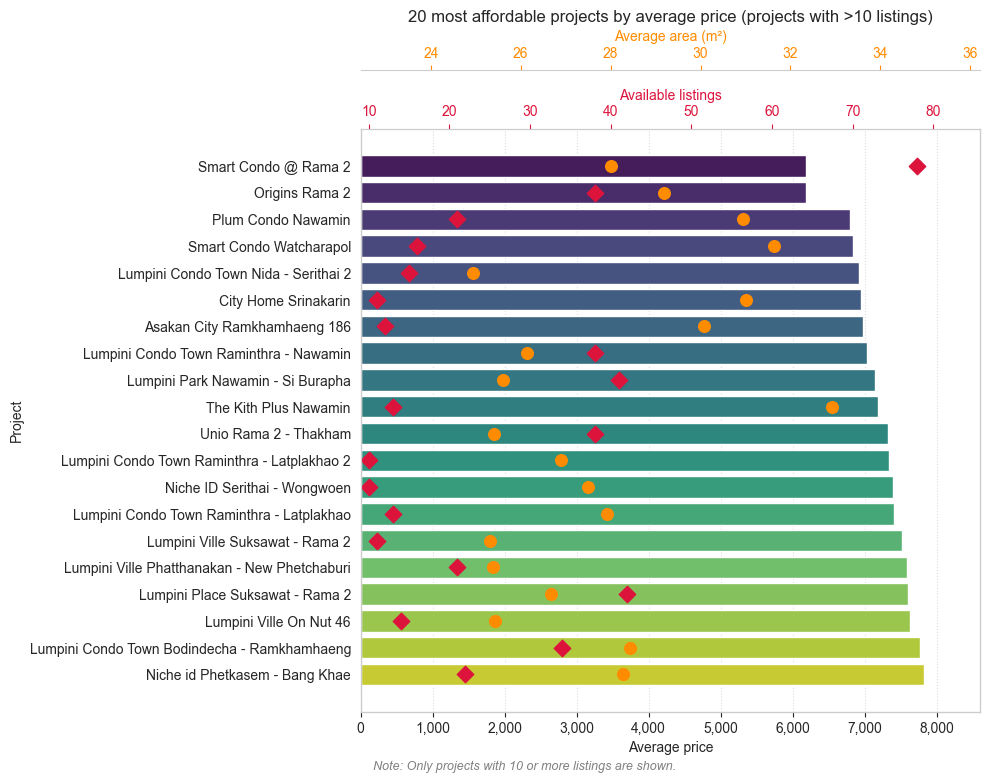

In [168]:
# ------------------------------------------------------------------
# 1. Re-compute the cheapest 20 and carry the mean area with us
# ------------------------------------------------------------------
project_counts = df.groupby('project')['title'].transform('size')
df_filtered = df[project_counts >= 10].copy()

bottom_projects_by_price = (
    df_filtered
    .groupby("project")
    .agg(avg_price=("price", "mean"),
         avg_area=("area", "mean"))
    .sort_values(by="avg_price", ascending=True)
    .head(20)
    .reset_index()
)

# ------------------------------------------------------------------
# 2. Listing counts for those projects
# ------------------------------------------------------------------
listing_counts_for_bottom = (
    df[df["project"].isin(bottom_projects_by_price["project"])]
      .groupby("project")["title"]
      .size()
      .reindex(bottom_projects_by_price["project"])
      .rename("listing_count")
)

# ------------------------------------------------------------------
# 3. Bar plot (cheapest projects)
# ------------------------------------------------------------------
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=bottom_projects_by_price,
    y="project",
    x="avg_price",
    palette="viridis"
)
ax.set_title("20 most affordable projects by average price (projects with >10 listings)")
ax.set_xlabel("Average price")
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.grid(axis='x', linestyle=':', alpha=0.7)
ax.set_ylabel("Project")
ax.set_xlim(0, bottom_projects_by_price["avg_price"].max() * 1.1)

# ------------------------------------------------------------------
# 4. Top twin axis: available listings (diamond markers)
# ------------------------------------------------------------------
ax2 = ax.twiny()
ax2.scatter(
    listing_counts_for_bottom.values,
    range(len(bottom_projects_by_price)),
    color="crimson",
    marker="D",
    s=70,
    label="Available listings"
)
ax2.set_xlabel("Available listings", color="crimson")
ax2.tick_params(axis='x', colors="crimson")
ax2.set_xlim(listing_counts_for_bottom.min() * 0.9,
             listing_counts_for_bottom.max() * 1.1)
ax2.grid(False)

# ------------------------------------------------------------------
# 5. Bottom twin axis: average area (circle markers)
# ------------------------------------------------------------------
ax3 = ax.twiny()
ax3.scatter(
    bottom_projects_by_price["avg_area"],
    range(len(bottom_projects_by_price)),
    color="darkorange",
    marker="o",
    s=70,
    label="Average area (m²)",
    zorder=5
)
ax3.set_xlabel("Average area (m²)", color="darkorange")
ax3.tick_params(axis='x', colors="darkorange")
# place the new spine *above* the main axes
ax3.spines["top"].set_position(("axes", 1.1))   # <- tweak this value
ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")
ax3.set_xlim(bottom_projects_by_price["avg_area"].min() * 0.9,
             bottom_projects_by_price["avg_area"].max() * 1.1)
ax3.grid(False)

# ------------------------------------------------------------------
# 7. Final touches
# ------------------------------------------------------------------
ax.text(
    0.02, -0.1,
    "Note: Only projects with 10 or more listings are shown.",
    transform=ax.transAxes,
    fontsize=9,
    style='italic',
    color='grey'
)
plt.tight_layout()

# save image
plt.savefig("images/projects_20affordable+area+listing.png")
plt.show()


## 20 most affordable (avg thb/sqm) project with avg area and available listing (>10 listing)

/var/folders/yj/1ngppt4s2fv4v4nw203ygj8m0000gp/T/ipykernel_1023/3669178748.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


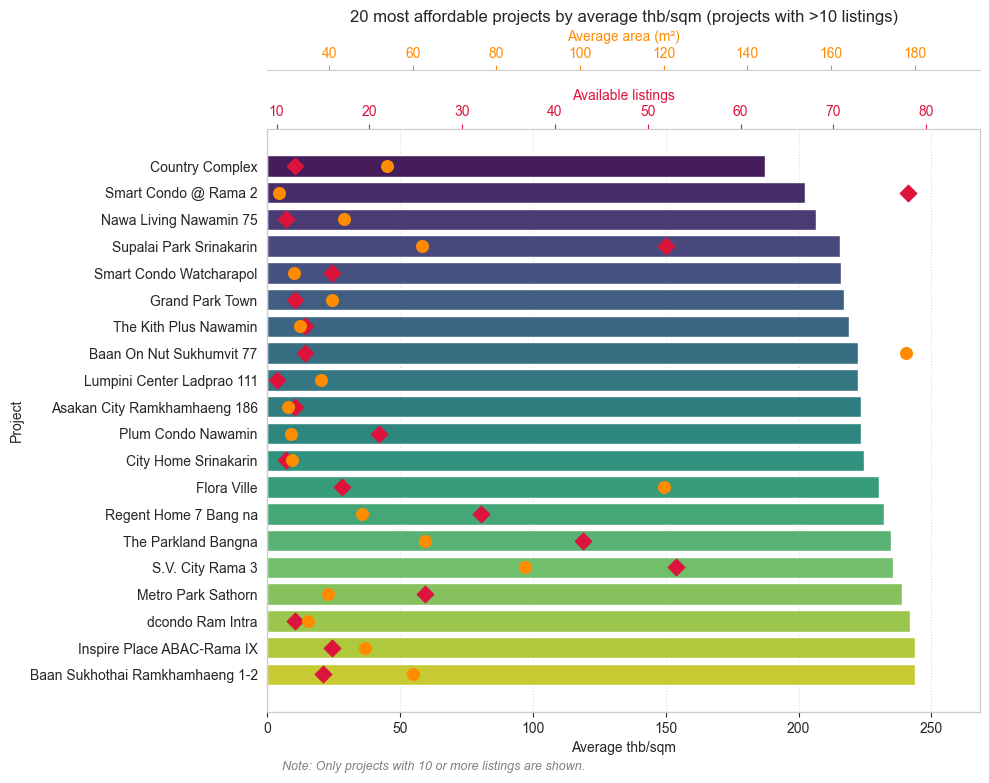

In [169]:
# ------------------------------------------------------------------
# 1. Re-compute the cheapest 20 and carry the mean area with us
# ------------------------------------------------------------------
project_counts = df.groupby('project')['title'].transform('size')
df_filtered = df[project_counts >= 10].copy()

bottom_projects_by_price = (
    df_filtered
    .groupby("project")
    .agg(avg_price=("thb/sqm", "mean"),
         avg_area=("area", "mean"))
    .sort_values(by="avg_price", ascending=True)
    .head(20)
    .reset_index()
)

# ------------------------------------------------------------------
# 2. Listing counts for those projects
# ------------------------------------------------------------------
listing_counts_for_bottom = (
    df[df["project"].isin(bottom_projects_by_price["project"])]
      .groupby("project")["title"]
      .size()
      .reindex(bottom_projects_by_price["project"])
      .rename("listing_count")
)

# ------------------------------------------------------------------
# 3. Bar plot (cheapest projects)
# ------------------------------------------------------------------
plt.figure(figsize=(10, 8))
ax = sns.barplot(
    data=bottom_projects_by_price,
    y="project",
    x="avg_price",
    palette="viridis"
)
ax.set_title("20 most affordable projects by average thb/sqm (projects with >10 listings)")
ax.set_xlabel("Average thb/sqm")
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
ax.grid(axis='x', linestyle=':', alpha=0.7)
ax.set_ylabel("Project")
ax.set_xlim(0, bottom_projects_by_price["avg_price"].max() * 1.1)

# ------------------------------------------------------------------
# 4. Top twin axis: available listings (diamond markers)
# ------------------------------------------------------------------
ax2 = ax.twiny()
ax2.scatter(
    listing_counts_for_bottom.values,
    range(len(bottom_projects_by_price)),
    color="crimson",
    marker="D",
    s=70,
    label="Available listings"
)
ax2.set_xlabel("Available listings", color="crimson")
ax2.tick_params(axis='x', colors="crimson")
ax2.set_xlim(listing_counts_for_bottom.min() * 0.9,
             listing_counts_for_bottom.max() * 1.1)
ax2.grid(False)

# ------------------------------------------------------------------
# 5. Bottom twin axis: average area (circle markers)
# ------------------------------------------------------------------
ax3 = ax.twiny()
ax3.scatter(
    bottom_projects_by_price["avg_area"],
    range(len(bottom_projects_by_price)),
    color="darkorange",
    marker="o",
    s=70,
    label="Average area (m²)",
    zorder=5
)
ax3.set_xlabel("Average area (m²)", color="darkorange")
ax3.tick_params(axis='x', colors="darkorange")
# place the new spine *above* the main axes
ax3.spines["top"].set_position(("axes", 1.1))   # <- tweak this value
ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")
ax3.set_xlim(bottom_projects_by_price["avg_area"].min() * 0.9,
             bottom_projects_by_price["avg_area"].max() * 1.1)
ax3.grid(False)

# ------------------------------------------------------------------
# 7. Final touches
# ------------------------------------------------------------------
ax.text(
    0.02, -0.1,
    "Note: Only projects with 10 or more listings are shown.",
    transform=ax.transAxes,
    fontsize=9,
    style='italic',
    color='grey'
)
plt.tight_layout()

# save image
plt.savefig("images/projects_20affordable_thbsqm+area+listing.png")
plt.show()


# Scatterplots

## price and area (log scale)

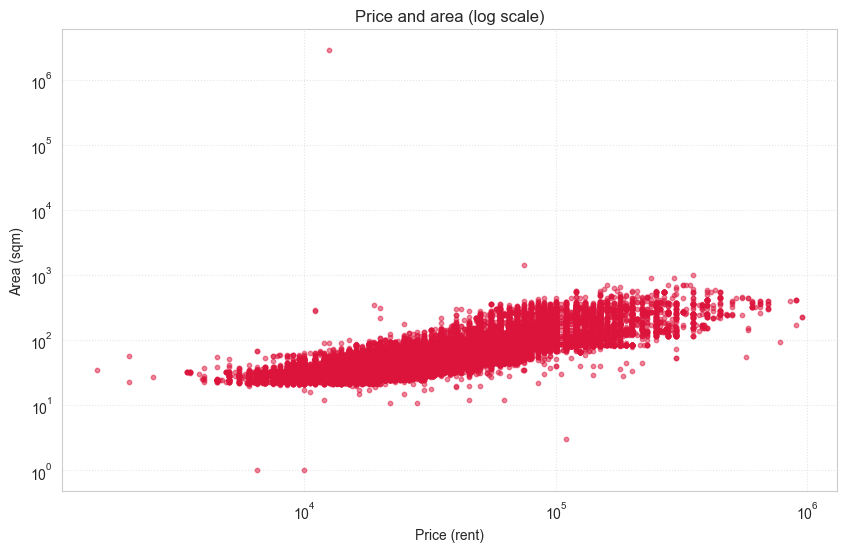

In [170]:
# scatter plot for price and area, log scale
plt.figure(figsize=(10, 6))
plt.scatter(
    df["price"],
    df["area"],
    alpha=0.5,
    s=10,
    color="crimson",
)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Price (rent)")
plt.ylabel("Area (sqm)")
plt.title("Price and area (log scale)")
plt.grid(True, ls=":", alpha=0.5)

# save image
plt.savefig("images/scatterplot_price_vs_area.png", dpi=300)
plt.show()

## price and area (0.5% trim)

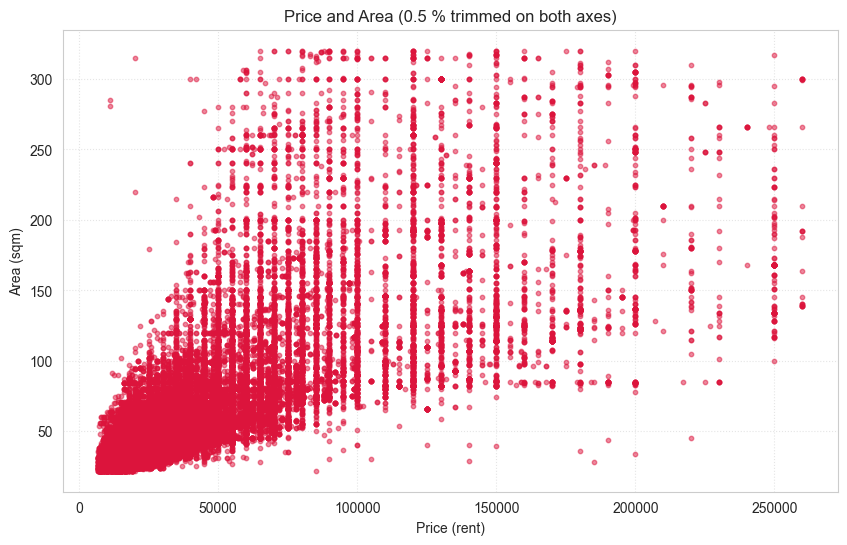

In [171]:
# 1. compute 0.5 % / 99.5 % quantiles
min_p, max_p = df["price"].quantile([0.005, 0.995])
min_a, max_a = df["area"].quantile([0.005, 0.995])

# 2. select inside both ranges
mask = (
    (df["price"] >= min_p) & (df["price"] <= max_p) &
    (df["area"] >= min_a) & (df["area"] <= max_a)
)
df_trim = df.loc[mask]

# 3. plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_trim["price"],
    df_trim["area"],
    alpha=0.5,
    s=10,
    color="crimson",
)
plt.xlabel("Price (rent)")
plt.ylabel("Area (sqm)")
plt.title("Price and Area (0.5 % trimmed on both axes)")
plt.grid(True, ls=":", alpha=0.5)

# save image
plt.savefig("images/scatterplot_price_vs_area_trimmed.png", dpi=300)
plt.show()


## thb/sqm and area (0.5% trim)

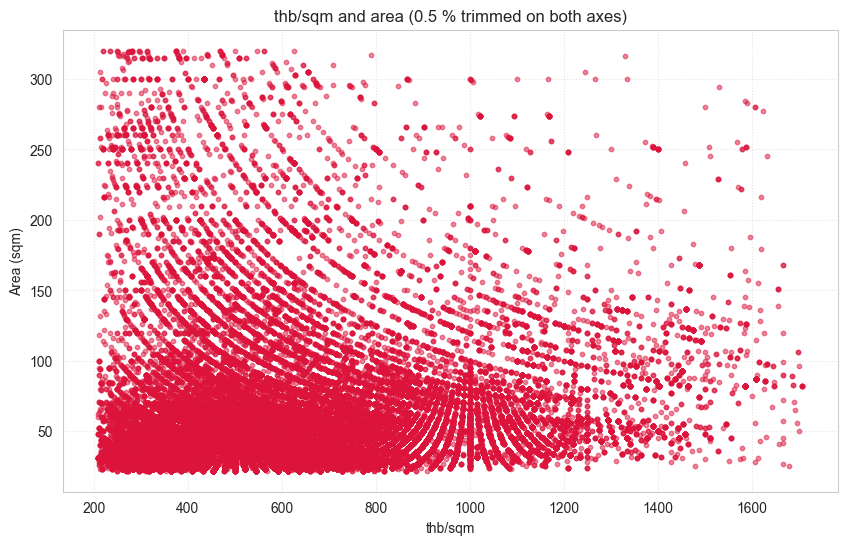

In [172]:
# 1. compute 0.5 % / 99.5 % quantiles
min_p, max_p = df["thb/sqm"].quantile([0.005, 0.995])
min_a, max_a = df["area"].quantile([0.005, 0.995])

# 2. select inside both ranges
mask = (
    (df["thb/sqm"] >= min_p) & (df["thb/sqm"] <= max_p) &
    (df["area"] >= min_a) & (df["area"] <= max_a)
)
df_trim = df.loc[mask]

# 3. plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_trim["thb/sqm"],
    df_trim["area"],
    alpha=0.5,
    s=10,
    color="crimson",
)

plt.xlabel("thb/sqm")
plt.ylabel("Area (sqm)")
plt.title("thb/sqm and area (0.5 % trimmed on both axes)")
plt.grid(True, ls=":", alpha=0.5)

# save image
plt.savefig("images/scatterplot_thb_sqm_vs_area_trimmed.png", dpi=300)
plt.show()

## price and bedroom (0.5% trim on price)

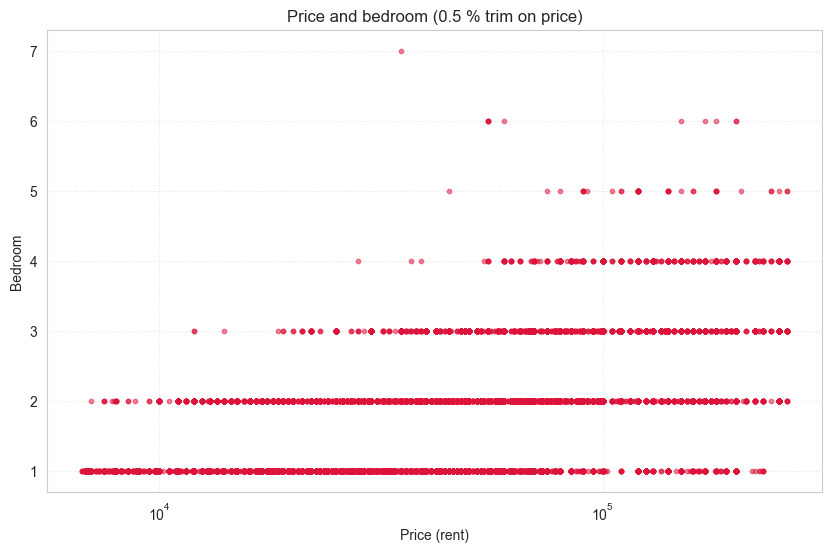

In [173]:
# price and bed
# 1. compute 0.5 % / 99.5 % quantiles
min_p, max_p = df["price"].quantile([0.005, 0.995])

# 2. select inside both ranges
mask = (
    (df["price"] >= min_p) & (df["price"] <= max_p) 
)
df_trim = df.loc[mask]

# 3. plot
plt.figure(figsize=(10, 6))
plt.scatter(
    df_trim["price"],
    df_trim["bed"],
    alpha=0.5,
    s=10,
    color="crimson",
)
plt.xscale("log")
# plt.yscale("log")
plt.xlabel("Price (rent)")
plt.ylabel("Bedroom")
plt.title("Price and bedroom (0.5 % trim on price)")
plt.grid(True, ls=":", alpha=0.5)

# save image
plt.savefig("images/scatterplot_price_vs_bedroom_trimmed.png", dpi=300)
plt.show()